In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Creat 1500 random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

In [3]:
# Create a list of cities' name
cities = []

# Indentify the nearest cities for the coordinates
for i in coordinates:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Add city to the list
    if city not in cities:
        cities.append(city)
        
# Show how many cities we detect
len(cities)

651

In [4]:
# Import the API key
from config import weather_api_key

In [5]:
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q='

In [6]:
# Create an empty list to hold the weather data
city_data = []

# Illustrate logging beginning
print('Beginning of Data Retrieval\n***************************')

# Create Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging
    if (i%50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create URL for each city and replace blanks with + for city names with white spaces
    city_url = url + city.replace(' ','+')

    # Log the URL, and other information
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Count the records
    record_count += 1
    
    # API request for each city
    try:
        # Retrieve data from JSON
        city_weather = requests.get(city_url).json()
        
        # Extract required field of data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert time from UTC to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append extracted data to city_data
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # Code the except block
    except:
        print('City not found')
        pass
    
# Show data extraction is completed
print('End of Data Retrieval\n***********************')

Beginning of Data Retrieval
***************************
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | apache junction
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | brenham
Processing Record 8 of Set 1 | kutum
Processing Record 9 of Set 1 | hihifo
City not found
Processing Record 10 of Set 1 | upington
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | coffs harbour
Processing Record 14 of Set 1 | mildura
Processing Record 15 of Set 1 | road town
Processing Record 16 of Set 1 | worland
Processing Record 17 of Set 1 | cabinda
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | barbar
City not found
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | lasa
Processing Re

Processing Record 42 of Set 4 | northam
Processing Record 43 of Set 4 | moree
Processing Record 44 of Set 4 | grand-lahou
Processing Record 45 of Set 4 | sicamous
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | buariki
City not found
Processing Record 48 of Set 4 | paita
Processing Record 49 of Set 4 | westport
Processing Record 50 of Set 4 | dickinson
Processing Record 1 of Set 5 | bloemfontein
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | mayumba
Processing Record 5 of Set 5 | caranavi
Processing Record 6 of Set 5 | hereford
Processing Record 7 of Set 5 | rivadavia
Processing Record 8 of Set 5 | mahajanga
Processing Record 9 of Set 5 | caldwell
Processing Record 10 of Set 5 | leningradskiy
Processing Record 11 of Set 5 | balkhash
Processing Record 12 of Set 5 | bilma
Processing Record 13 of Set 5 | awjilah
Processing Record 14 of Set 5 | talaya
Processing Record 15 of Set 5 | aklavik


Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | synya
Processing Record 38 of Set 8 | stokmarknes
Processing Record 39 of Set 8 | san lazaro
Processing Record 40 of Set 8 | moerai
Processing Record 41 of Set 8 | bogorodsk
Processing Record 42 of Set 8 | vanimo
Processing Record 43 of Set 8 | meyungs
City not found
Processing Record 44 of Set 8 | honiara
Processing Record 45 of Set 8 | khasan
Processing Record 46 of Set 8 | marbella
Processing Record 47 of Set 8 | port lincoln
Processing Record 48 of Set 8 | mount gambier
Processing Record 49 of Set 8 | nyimba
Processing Record 50 of Set 8 | aksu
Processing Record 1 of Set 9 | bakchar
Processing Record 2 of Set 9 | porto velho
Processing Record 3 of Set 9 | siniscola
Processing Record 4 of Set 9 | finschhafen
Processing Record 5 of Set 9 | puerto baquerizo moreno
Processing Record 6 of Set 9 | bilibino
Processing Record 7 of Set 9 | golden
Processing Record 8 of Set 9 | salalah
Processing Record 9 of Set 9 | les es

Processing Record 29 of Set 12 | hudson bay
Processing Record 30 of Set 12 | santa lucia
Processing Record 31 of Set 12 | sitka
Processing Record 32 of Set 12 | dudinka
Processing Record 33 of Set 12 | magadan
Processing Record 34 of Set 12 | yagodnoye
Processing Record 35 of Set 12 | coquimbo
Processing Record 36 of Set 12 | gat
Processing Record 37 of Set 12 | omsukchan
Processing Record 38 of Set 12 | arequipa
Processing Record 39 of Set 12 | labuhan
Processing Record 40 of Set 12 | along
Processing Record 41 of Set 12 | tupik
Processing Record 42 of Set 12 | uthal
Processing Record 43 of Set 12 | barawe
City not found
Processing Record 44 of Set 12 | coolum beach
Processing Record 45 of Set 12 | aguililla
Processing Record 46 of Set 12 | kirakira
Processing Record 47 of Set 12 | bima
Processing Record 48 of Set 12 | asifabad
Processing Record 49 of Set 12 | mascota
Processing Record 50 of Set 12 | saint-francois
Processing Record 1 of Set 13 | norsup
Processing Record 2 of Set 13 |

In [7]:
# Create a DataFrame from the extracted data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,28.31,96,100,4.52,RU,2022-09-29 18:24:53
1,Ribeira Grande,38.5167,-28.7000,72.00,60,40,11.50,PT,2022-09-29 18:21:46
2,Apache Junction,33.4151,-111.5496,93.16,20,0,7.00,US,2022-09-29 18:24:54
3,Busselton,-33.6500,115.3333,57.78,63,0,11.74,AU,2022-09-29 18:21:38
4,Cockburn Town,21.4612,-71.1419,81.21,75,4,11.79,TC,2022-09-29 18:24:55


In [8]:
# Reorder the columns
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-09-29 18:24:53,71.9667,102.5000,28.31,96,100,4.52
1,Ribeira Grande,PT,2022-09-29 18:21:46,38.5167,-28.7000,72.00,60,40,11.50
2,Apache Junction,US,2022-09-29 18:24:54,33.4151,-111.5496,93.16,20,0,7.00
3,Busselton,AU,2022-09-29 18:21:38,-33.6500,115.3333,57.78,63,0,11.74
4,Cockburn Town,TC,2022-09-29 18:24:55,21.4612,-71.1419,81.21,75,4,11.79


In [9]:
# Create an output CSV file and export the data
output_file_path = 'Weather_data/cities.csv'
city_data_df.to_csv(output_file_path, index_label = "City ID")

In [10]:
# Extract some parameters for visualization
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']
today = time.strftime('%x')

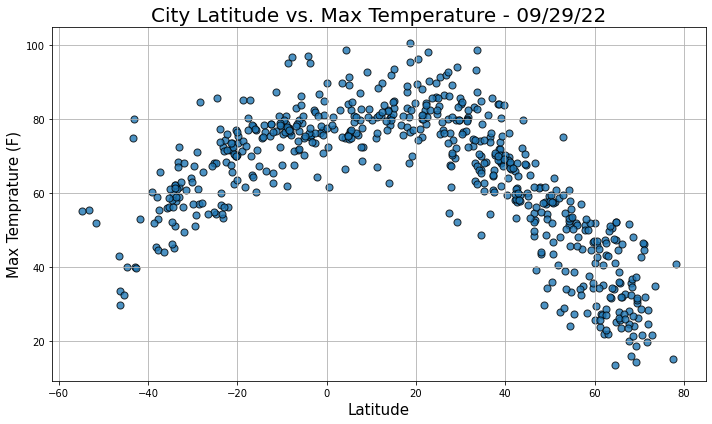

In [11]:
# Create Scatter Chart: Latitude vs. Max Temperature
plt.figure(figsize = (10,6))
plt.scatter(lats,
            max_temps,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities',
            s=50)

plt.title(f'City Latitude vs. Max Temperature - {today}', fontsize=20)
plt.ylabel('Max Temprature (F)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.savefig("Outputs/scatter_LatVsTemp.png")
plt.show()

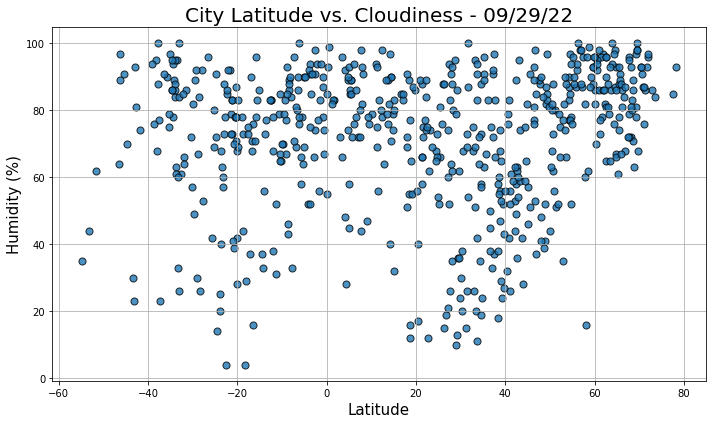

In [12]:
# Create Scatter Chart: Humidity vs. Humidity
plt.figure(figsize = (10,6))
plt.scatter(lats,
            humidity,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities',
            s=50)

plt.title(f'City Latitude vs. Cloudiness - {today}', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.savefig("Outputs/scatter_LatVsHumidity.png")
plt.show()

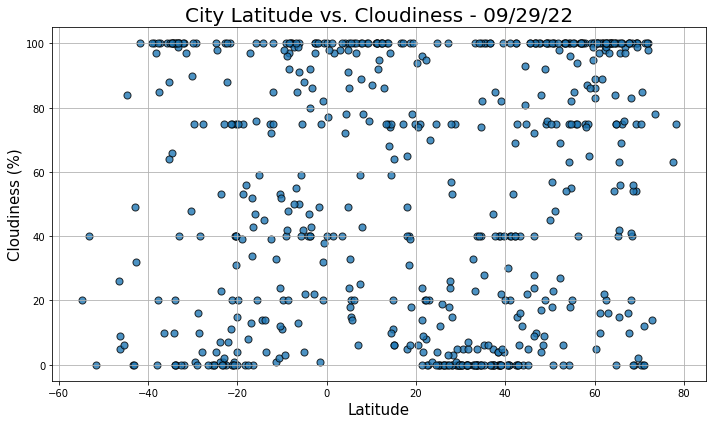

In [13]:
# Create Scatter Chart: Latitude vs. Cloudiness
plt.figure(figsize = (10,6))
plt.scatter(lats,
            cloudiness,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities',
            s=50)

plt.title(f'City Latitude vs. Cloudiness - {today}', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.savefig("Outputs/scatter_LatVsCloud.png")
plt.show()

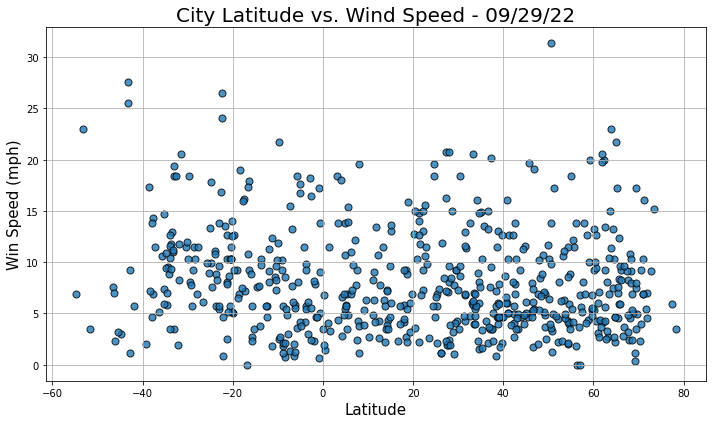

In [14]:
# Create Scatter Chart: Latitude vs. Wind Speed
plt.figure(figsize = (10,6))
plt.scatter(lats,
            wind_speed,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities',
            s=50)

plt.title(f'City Latitude vs. Wind Speed - {today}', fontsize=20)
plt.ylabel('Win Speed (mph)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.savefig("Outputs/scatter_LatVsWind.png")
plt.show()

In [40]:
# Create a function for plot scatter and its linear Regression
def plot_linear_regression(x_val, y_val, dep_var, hemisphere, text_coord):
       
    # Run Regression
    (slope, intercept, rval, pval, std) = linregress(x_val, y_val)
    
    # Calculate Regression values
    reg_val = [(slope * x + intercept) for x in x_val]
    
    # Line equation
    line_eq = f'Y = {round(slope,2)} X + {round(intercept,2)}'
    
    # Plot
    plt.figure(figsize = (10,6))
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, 'r')
    plt.annotate(f'{line_eq}\n'
                 f'R Value: {round(rval,2)}\n'
                 f'P Value: {round(pval,2)}',
                 text_coord, fontsize=15, color='red')
    plt.title(f'Linear Regression on the {hemisphere}ern Hemisphere - Latitude vs. {dep_var}')
    plt.xlabel('Latitude')
    plt.ylabel(dep_var)
    
    plt.tight_layout()
    plt.savefig(f'Outputs/LatVs{dep_var}_{hemisphere}.png')
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrame
north_df = city_data_df.loc[(city_data_df['Lat'] >=0)]
south_df = city_data_df.loc[(city_data_df['Lat'] <=0)]

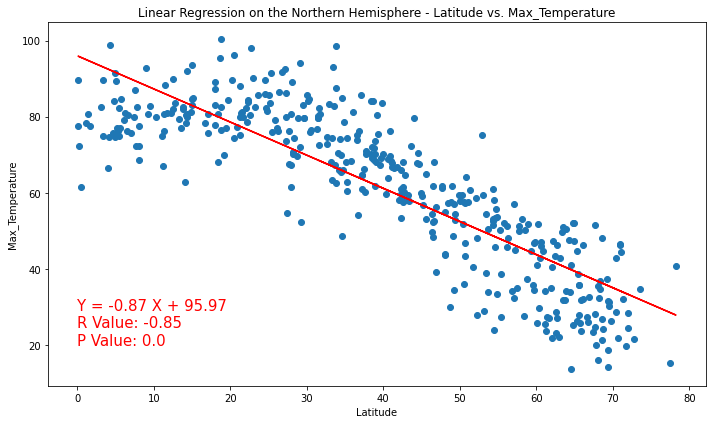

In [78]:
# Plot Latitude vs. Max Temperature for Northern Hemisphere
x_val = north_df['Lat']
y_val = north_df['Max Temp']
dep_var = 'Max_Temperature'
hemisphere = 'North'
coord = (0,20)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

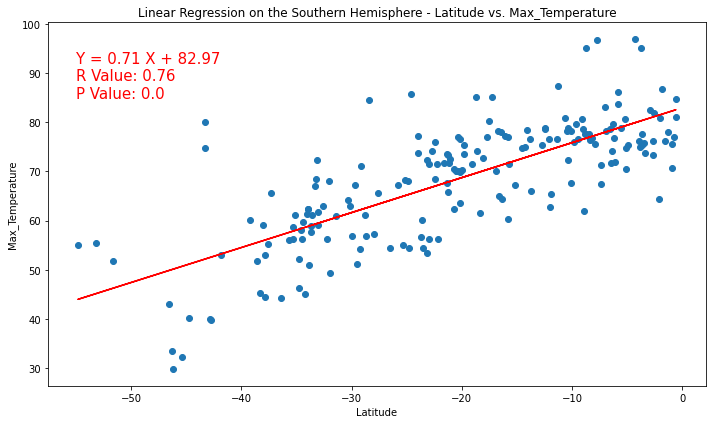

In [79]:
# Plot Latitude vs. Max Temperature for Southern Hemisphere
x_val = south_df['Lat']
y_val = south_df['Max Temp']
dep_var = 'Max_Temperature'
hemisphere = 'South'
coord = (-55,85)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

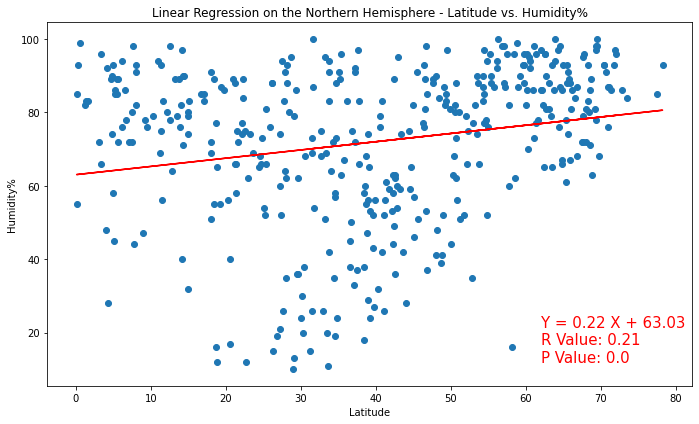

In [80]:
# Plot Latitude vs. Humidity for Northern Hemisphere
x_val = north_df['Lat']
y_val = north_df['Humidity']
dep_var = 'Humidity%'
hemisphere = 'North'
coord = (62,12)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

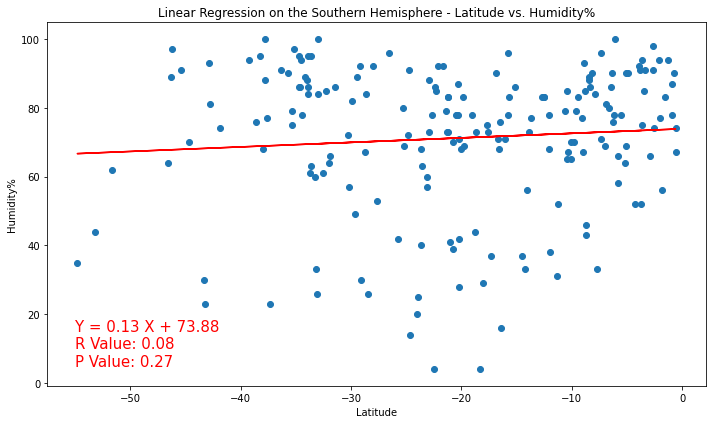

In [81]:
# Plot Latitude vs. Humidity for Southern Hemisphere
x_val = south_df['Lat']
y_val = south_df['Humidity']
dep_var = 'Humidity%'
hemisphere = 'South'
coord = (-55,5)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

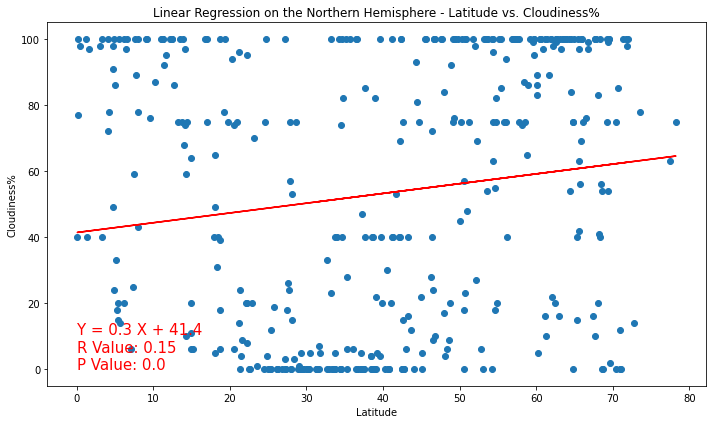

In [82]:
# Plot Latitude vs. Cloudiness for Northern Hemisphere
x_val = north_df['Lat']
y_val = north_df['Cloudiness']
dep_var = 'Cloudiness%'
hemisphere = 'North'
coord = (0,0)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

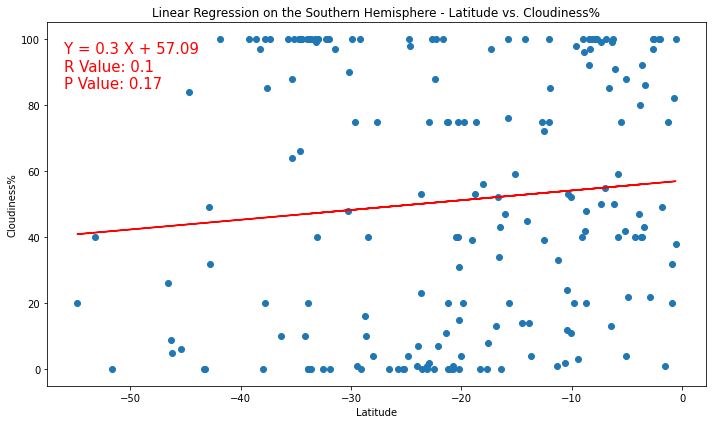

In [83]:
# Plot Latitude vs. Cloudiness for Southern Hemisphere
x_val = south_df['Lat']
y_val = south_df['Cloudiness']
dep_var = 'Cloudiness%'
hemisphere = 'South'
coord = (-56,85)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

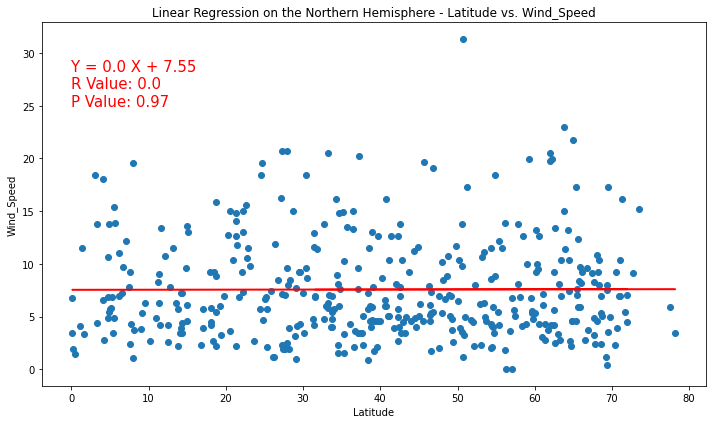

In [84]:
# Plot Latitude vs. Wind Speed for Northern Hemisphere
x_val = north_df['Lat']
y_val = north_df['Wind Speed']
dep_var = 'Wind_Speed'
hemisphere = 'North'
coord = (0,25)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)

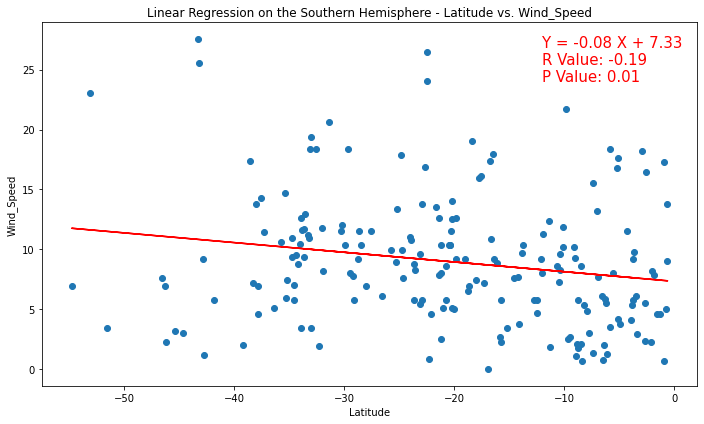

In [85]:
# Plot Latitude vs. Wind Speed for Southern Hemisphere
x_val = south_df['Lat']
y_val = south_df['Wind Speed']
dep_var = 'Wind_Speed'
hemisphere = 'South'
coord = (-12,24)

plot_linear_regression(x_val, y_val, dep_var, hemisphere, coord)